In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import RK45

## Analytic plot

In [ ]:
t = np.arange(0, 20, 0.001, dtype=np.float64)

In [ ]:
s1 = 4*np.exp(-t)
s2 = -8*np.exp(-t) + 16*np.exp(-0.5*t)

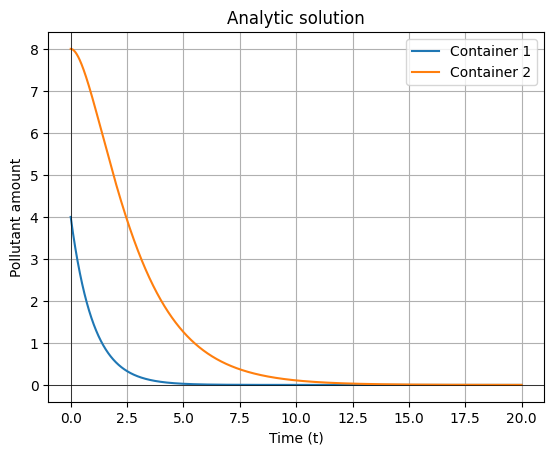

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, s1, label='Container 1')
ax.plot(t, s2, label='Container 2')
ax.axhline(0, color='black', linewidth=.5)
ax.axvline(0, color='black', linewidth=.5)
ax.grid(True, which='both')
ax.set_title('Analytic solution')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Pollutant amount')
ax.legend()

## Numerical method and plot

In [ ]:
def fun(t, x):
  A = np.array([[-1, 0], [1, -0.5]])
  return A @ x

In [ ]:
t0 = 0
y0 = [4, 8]
rk = RK45(fun=fun, t0=t0, y0=y0, t_bound=20, vectorized=True, max_step=1, rtol=1e-8, atol=1e-10)
n_t = []
n_y = []
for i in range(200):
  rk.step()
  n_t.append(rk.t)
  n_y.append(rk.y)
  if rk.status == 'finished':
    break
n_t = np.array(n_t)
n_y = np.array(n_y)

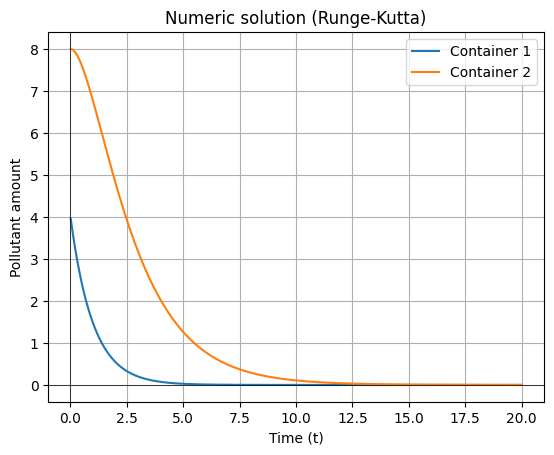

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_t, n_y, label=["Container 1", "Container 2"])
ax.axhline(0, color='black', linewidth=.5)
ax.axvline(0, color='black', linewidth=.5)
ax.grid(True, which='both')
ax.set_title('Numeric solution (Runge-Kutta)')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Pollutant amount')
ax.legend()

### Comparison with analytic result

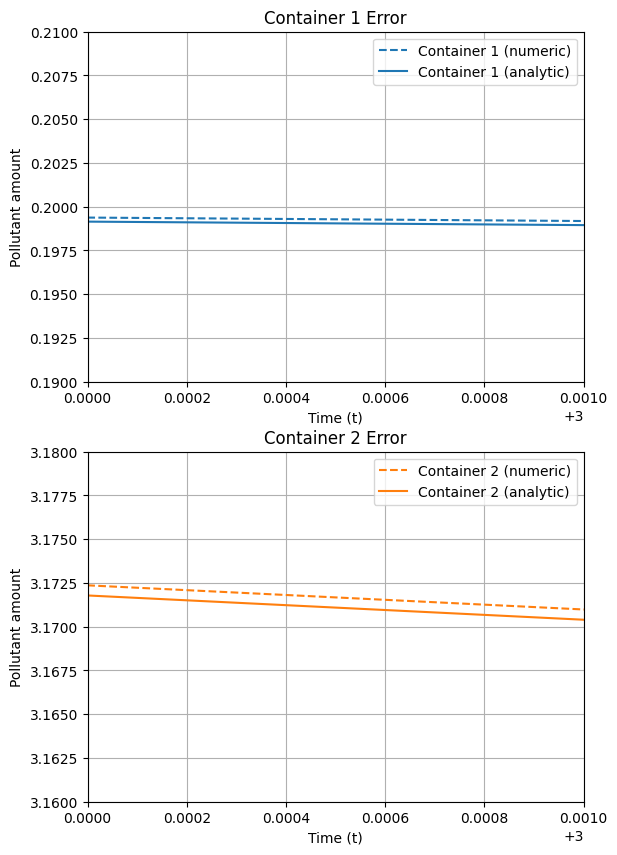

In [ ]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(10)
s = [s1, s2]
xl = [(3, 3.001), (3, 3.001)]
yl = [(0.19, 0.21), (3.16, 3.18)]
color = ['tab:blue', 'tab:orange']
for i in range(2):
  AX = ax[i]
  AX.plot(n_t, n_y[:,i], label=f"Container {i+1} (numeric)",  linestyle='--', color=color[i])
  AX.plot(t, s[i], label=f"Container {i+1} (analytic)", color=color[i])
  AX.set_xlim(xl[i])
  AX.set_ylim(yl[i])
  AX.axhline(0, color='black', linewidth=.5)
  AX.axvline(0, color='black', linewidth=.5)
  AX.grid(True, which='both')
  AX.set_title(f'Container {i+1} Error')
  AX.set_xlabel('Time (t)')
  AX.set_ylabel('Pollutant amount')
  AX.legend()

In [ ]:
def factory(V1, V2, r):
  def f(t, x):
    A = np.array([[-r/V1, 0], [r/V1, -r/V2]])
    return A @ x
  return f

### Varying $r$

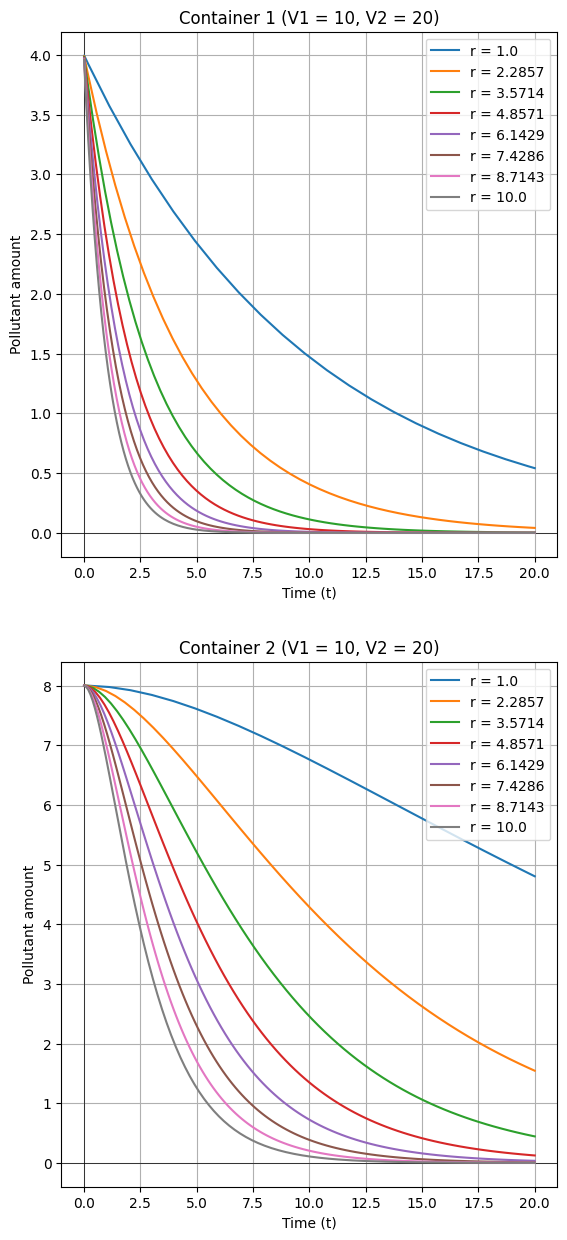

In [ ]:
r = np.linspace(1, 10, num=8)
fig, ax = plt.subplots(2, 1)
fig.set_figheight(15)
t0 = 0
y0 = [4, 8]
for i in range(2):
  AX = ax[i]
  AX.axhline(0, color='black', linewidth=.5)
  AX.axvline(0, color='black', linewidth=.5)
  AX.grid(True, which='both')
  AX.set_title(f'Container {i + 1} (V1 = 10, V2 = 20)')
  AX.set_xlabel('Time (t)')
  AX.set_ylabel('Pollutant amount')

for i in r:
  r_f = factory(10, 20, i)
  rk = RK45(fun=r_f, t0=t0, y0=y0, t_bound=20, vectorized=True, max_step=1, rtol=1e-8, atol=1e-10)
  r_t = []
  r_y = []
  for j in range(200):
    rk.step()
    r_t.append(rk.t)
    r_y.append(rk.y)
    if rk.status == 'finished':
      break
  r_t = np.array(r_t)
  r_y = np.array(r_y)
  for j in range(2):
    AX = ax[j]
    AX.plot(r_t, r_y[:, j], label=f"r = {i:.05}")

for i in range(2):
  AX = ax[i]
  AX.legend()

### Varying $V_1$

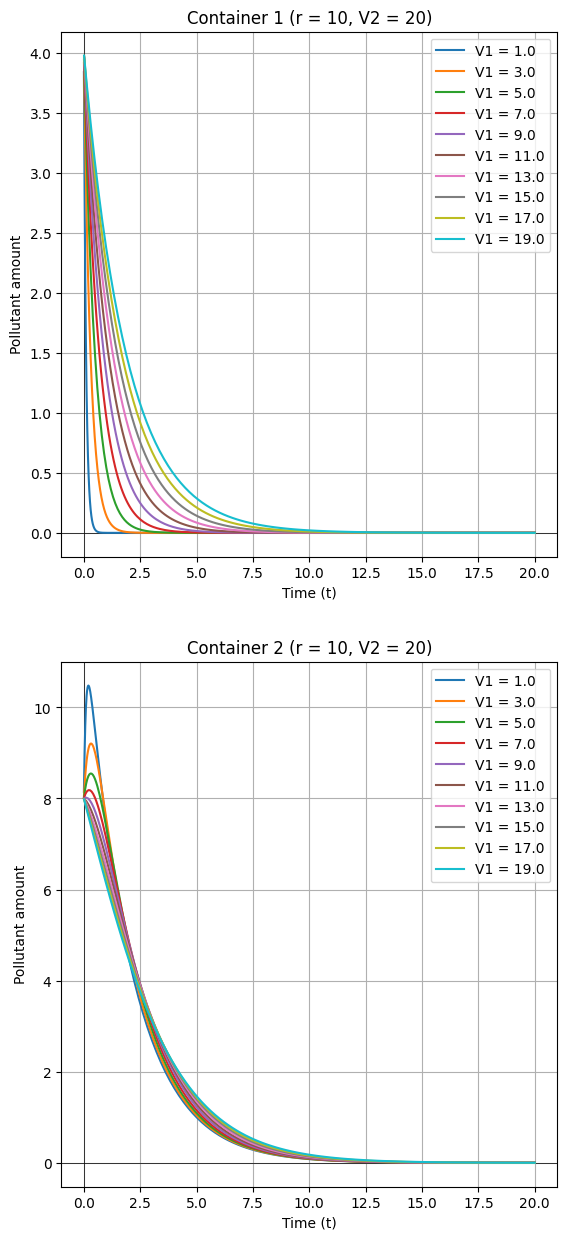

In [ ]:
V1 = np.linspace(1, 19, num=10)
fig, ax = plt.subplots(2, 1)
fig.set_figheight(15)
t0 = 0
y0 = [4, 8]
for i in range(2):
  AX = ax[i]
  AX.axhline(0, color='black', linewidth=.5)
  AX.axvline(0, color='black', linewidth=.5)
  AX.grid(True, which='both')
  AX.set_title(f'Container {i + 1} (r = 10, V2 = 20)')
  AX.set_xlabel('Time (t)')
  AX.set_ylabel('Pollutant amount')

for i in V1:
  r_f = factory(i, 20, 10)
  rk = RK45(fun=r_f, t0=t0, y0=y0, t_bound=20, vectorized=True, max_step=1, rtol=1e-8, atol=1e-10)
  r_t = []
  r_y = []
  for j in range(200):
    rk.step()
    r_t.append(rk.t)
    r_y.append(rk.y)
    if rk.status == 'finished':
      break
  r_t = np.array(r_t)
  r_y = np.array(r_y)
  for j in range(2):
    AX = ax[j]
    AX.plot(r_t, r_y[:, j], label=f"V1 = {i:.05}")

for i in range(2):
  AX = ax[i]
  AX.legend()

### Varying $V_2$

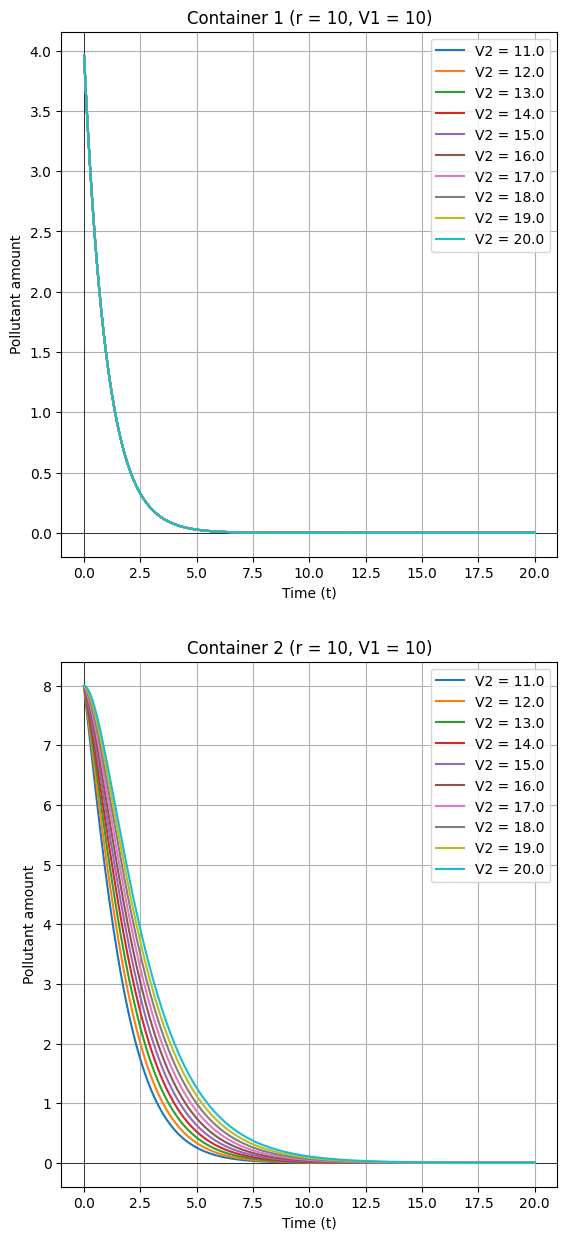

In [ ]:
V2 = np.linspace(11, 20, num=10)
fig, ax = plt.subplots(2, 1)
fig.set_figheight(15)
t0 = 0
y0 = [4, 8]
for i in range(2):
  AX = ax[i]
  AX.axhline(0, color='black', linewidth=.5)
  AX.axvline(0, color='black', linewidth=.5)
  AX.grid(True, which='both')
  AX.set_title(f'Container {i + 1} (r = 10, V1 = 10)')
  AX.set_xlabel('Time (t)')
  AX.set_ylabel('Pollutant amount')

for i in V2:
  r_f = factory(10, i, 10)
  rk = RK45(fun=r_f, t0=t0, y0=y0, t_bound=20, vectorized=True, max_step=1, rtol=1e-8, atol=1e-10)
  r_t = []
  r_y = []
  for j in range(200):
    rk.step()
    r_t.append(rk.t)
    r_y.append(rk.y)
    if rk.status == 'finished':
      break
  r_t = np.array(r_t)
  r_y = np.array(r_y)
  for j in range(2):
    AX = ax[j]
    AX.plot(r_t, r_y[:, j], label=f"V2 = {i:.05}")

for i in range(2):
  AX = ax[i]
  AX.legend()